In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']


In [51]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 450
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 1e-3
d_cdl = 1e-3

L = 10
h = L / 400

A_k = 10**(-17)

A_D = 10**(-18)

A_L = 10**(-6)

A_C = A_k*A_L/A_D
A_phi = R*Temp/Ff
A_E = A_phi/A_L
phi_ext = 0.56/A_phi

x = np.arange(0, L+h, h)
Nx = len(x)

A1 = -Ff**2/e_f/e_0/R/Temp*(A_k*A_L**3/A_D)*2
A2 = -e_dl/e_f/d_dl
A3 = e_f*(d_dl/e_dl + d_cdl/e_cdl)

In [14]:
def poison(C):
    phi = np.zeros(Nx)
    A = np.zeros((Nx, Nx))
    d = np.zeros(Nx)
    A[0, 0] = -1/h + A2
    A[0, 1] = 1/h
    d[0] = A2*phi_ext
    A[Nx-1, Nx-1] = A3/h + 1
    A[Nx-1, Nx-2] = -A3/h
    d[Nx-1] = 0
    d[1:Nx-1] = A1*C[1:Nx-1]
    for i in range(1, Nx-1):
        A[i, i] = -2/h**2
        A[i, i+1] = 1/h**2
        A[i, i-1] = 1/h**2
    phi = np.linalg.solve(A, d.T).T
    return phi

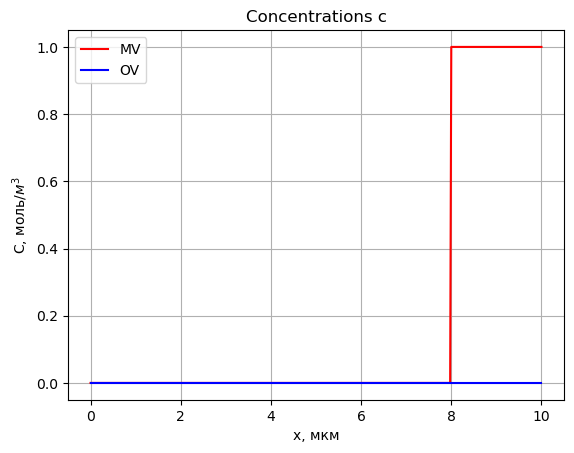

In [36]:
C_MV = np.zeros(Nx)
C_OV = np.zeros(Nx)

#C_OV[:Nx//5] = 1
C_MV[-Nx//5:] = 1

C = C_OV - C_MV

plt.plot(x, C_MV, 'r', label='MV')
plt.plot(x, C_OV, 'b', label='OV')
plt.title(f'Concentrations c')
plt.legend()
plt.xlabel('x, мкм')
plt.ylabel(r'C, моль/$м^{3}$')
plt.grid()
#plt.savefig(path+f'C({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

In [37]:
phi = poison(C)

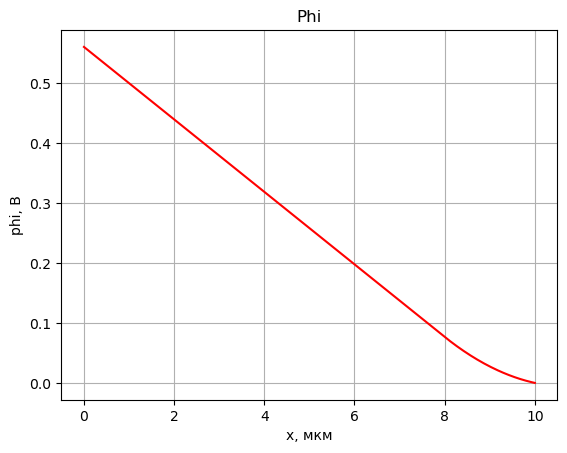

In [38]:
plt.plot(x, phi*A_phi, 'r', label='phi')
plt.title(f'Phi')
plt.xlabel('x, мкм')
plt.ylabel('phi, В')
plt.grid()
#plt.savefig(path+f'phi({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

0.046202966989588035


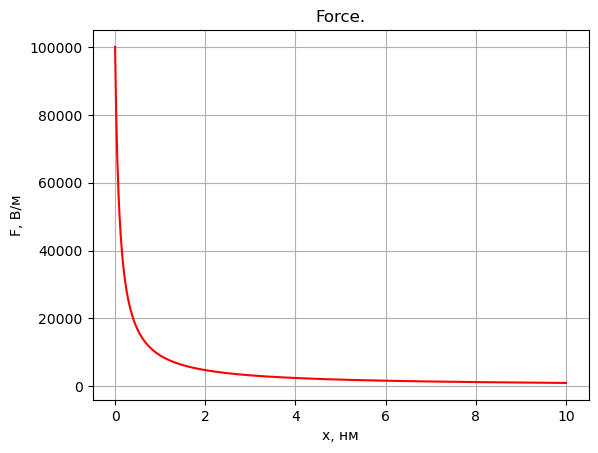

In [50]:
E_1 = 1/(100*x*A_L + 10**(-5))/A_E
#E_1 = 10**(5 - x*A_L)/A_E

phi_ext_1 = np.trapz(E_1, x)
print(phi_ext_1*A_phi)

plt.plot(x, E_1*A_E, 'r', label='F')
plt.title(f'Force.')
plt.xlabel('x, нм')
plt.ylabel('F, В/м')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

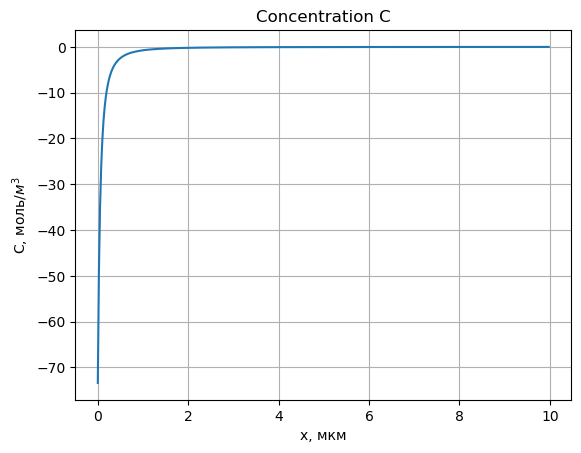

In [48]:
C_1 = (E_1[1:] - E_1[:-1])/h /Ff * e_f * e_0 * A_E/A_L / A_C

plt.plot(x[:-1], C_1)
plt.title(f'Concentration C')
plt.xlabel('x, мкм')
plt.ylabel(r'C, моль/$м^{3}$')
plt.grid()
#plt.savefig(path+f'C({t[num]:.3f}).png', format='png', dpi=300)
plt.show()